Шаг 1: Загрузка и предварительный анализ данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
train_data = pd.read_excel('train.xlsx')

# Преобразование даты в формат datetime
train_data['dt'] = pd.to_datetime(train_data['dt'])

# Просмотр первых строк данных
print(train_data.head())

# Просмотр информации о данных
print(train_data.info())

# Описательная статистика
print(train_data.describe())

# Проверка на пропущенные значения
print(train_data.isnull().sum())

          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668
dt                  0
Цена 

Шаг 2: Визуализация временного ряда

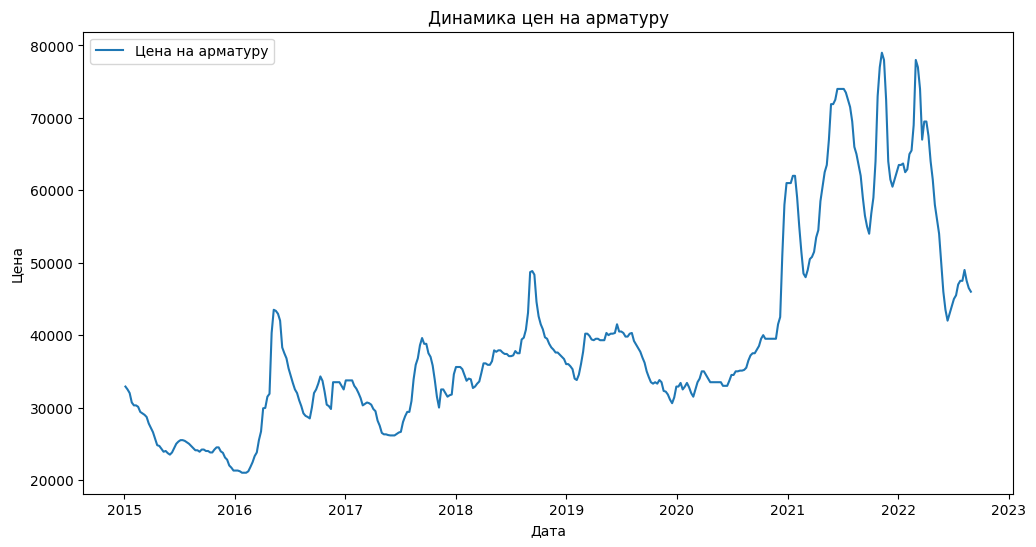

In [2]:
# Визуализация временного ряда
plt.figure(figsize=(12, 6))
plt.plot(train_data['dt'], train_data['Цена на арматуру'], label='Цена на арматуру')
plt.title('Динамика цен на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

Шаг 3: Разделение временного ряда на компоненты

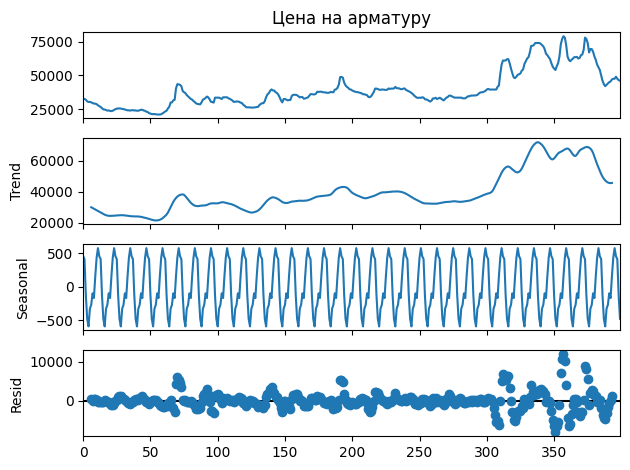

Выводы по декомпозиции временного ряда:
1. Тренд: Наблюдается возрастающий тренд, что может указывать на рост цен на арматуру.
2. Сезонность: Сезонность выражена, что может указывать на наличие периодических колебаний цен.
3. Остатки: Остатки имеют случайный характер, что может указывать на недостаточное] объяснение данных моделью.


In [4]:
# Разделение временного ряда на компоненты
decomposition = seasonal_decompose(train_data['Цена на арматуру'], model='additive', period=12)
decomposition.plot()
plt.show()

# Выводы
print("Выводы по декомпозиции временного ряда:")
print("1. Тренд: Наблюдается возрастающий тренд, что может указывать на рост цен на арматуру.")
print("2. Сезонность: Сезонность выражена, что может указывать на наличие периодических колебаний цен.")
print("3. Остатки: Остатки имеют случайный характер, что может указывать на недостаточное] объяснение данных моделью.")

Шаг 4: Проверка на стационарность

In [5]:
from statsmodels.tsa.stattools import adfuller

# Функция для проверки стационарности
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Ряд стационарен")
    else:
        print("Ряд нестационарен")

# Проверка исходного ряда на стационарность
check_stationarity(train_data['Цена на арматуру'])

ADF Statistic: -1.9258699893713453
p-value: 0.3199906102569917
Critical Values: {'1%': np.float64(-3.4470566389664703), '5%': np.float64(-2.8689037160476016), '10%': np.float64(-2.570692663557422)}
Ряд нестационарен


Шаг 5: Приведение ряда к стационарному

In [6]:
# Приведение ряда к стационарному с помощью дифференцирования
train_data['Цена на арматуру_diff'] = train_data['Цена на арматуру'].diff().dropna()

# Проверка стационарности после дифференцирования
check_stationarity(train_data['Цена на арматуру_diff'].dropna())

ADF Statistic: -7.7060615041152065
p-value: 1.3006938373810178e-11
Critical Values: {'1%': np.float64(-3.447405233596701), '5%': np.float64(-2.8690569369014605), '10%': np.float64(-2.5707743450830893)}
Ряд стационарен


Шаг 6: Создание признаков на основе даты

In [7]:
# Создание признаков на основе даты
train_data['year'] = train_data['dt'].dt.year
train_data['month'] = train_data['dt'].dt.month
train_data['day'] = train_data['dt'].dt.day
train_data['day_of_week'] = train_data['dt'].dt.dayofweek

Шаг 7: Подготовка данных для модели

In [8]:
# Разделение данных на признаки и целевую переменную
X_train = train_data.drop(['dt', 'Цена на арматуру', 'Цена на арматуру_diff'], axis=1).dropna()
y_train = train_data['Цена на арматуру_diff'].dropna()

Шаг 8: Обучение модели

In [11]:
# Приведение ряда к стационарному с помощью дифференцирования
train_data['Цена на арматуру_diff'] = train_data['Цена на арматуру'].diff()

# Удаление строк с пропущенными значениями
train_data = train_data.dropna()

# Создание признаков на основе даты
train_data['year'] = train_data['dt'].dt.year
train_data['month'] = train_data['dt'].dt.month
train_data['day'] = train_data['dt'].dt.day
train_data['day_of_week'] = train_data['dt'].dt.dayofweek

# Разделение данных на признаки и целевую переменную
X_train = train_data.drop(['dt', 'Цена на арматуру', 'Цена на арматуру_diff'], axis=1)
y_train = train_data['Цена на арматуру_diff']

# Проверка размеров данных
print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")

# Используем RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Размер X_train: (399, 4)
Размер y_train: (399,)


RandomForestRegressor(random_state=42)

Шаг 9: Предсказание на тренировочных данных

In [12]:
# Предсказание на тренировочных данных
y_train_pred = model.predict(X_train)

# Оценка модели на тренировочных данных
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Среднеквадратичная ошибка на тренировочных данных (MSE): {mse_train:.2f}')
print(f'Средняя абсолютная ошибка на тренировочных данных (MAE): {mae_train:.2f}')

Среднеквадратичная ошибка на тренировочных данных (MSE): 413203.57
Средняя абсолютная ошибка на тренировочных данных (MAE): 389.68


Шаг 10: Визуализация результатов тренировки

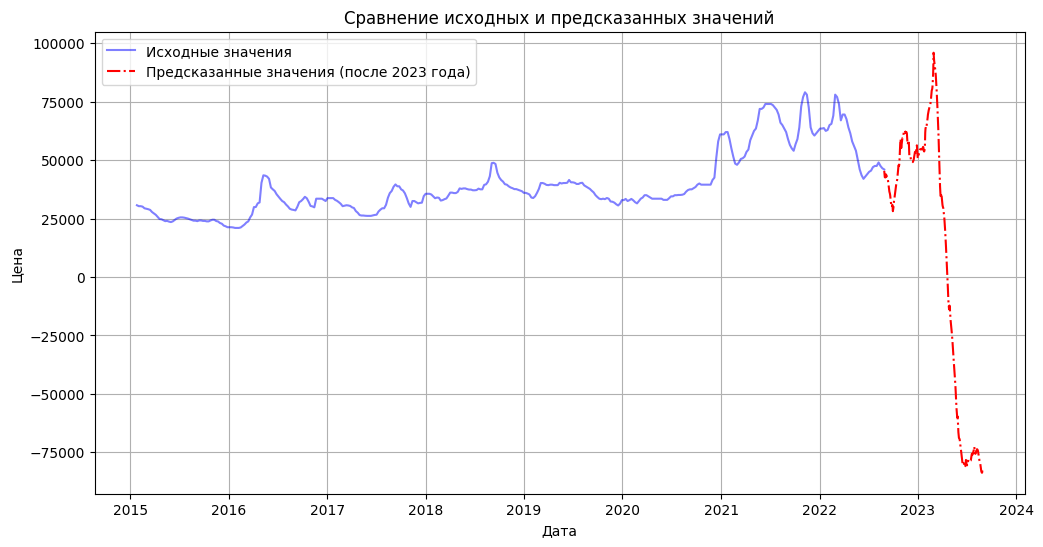

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Приведение ряда к стационарному с помощью дифференцирования
train_data['Цена на арматуру_diff'] = train_data['Цена на арматуру'].diff()

# Удаление строк с пропущенными значениями
train_data = train_data.dropna()

# Создание признаков на основе даты
train_data['year'] = train_data['dt'].dt.year
train_data['month'] = train_data['dt'].dt.month
train_data['day'] = train_data['dt'].dt.day
train_data['day_of_week'] = train_data['dt'].dt.dayofweek

# Разделение данных на признаки и целевую переменную
X_train = train_data.drop(['dt', 'Цена на арматуру', 'Цена на арматуру_diff'], axis=1)
y_train = train_data['Цена на арматуру_diff']

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Создание данных для прогнозирования (после 2023 года)
future_data = train_data[train_data['dt'] >= '2023-01-01'].copy()

# Если данных после 2023 года нет, создаем их искусственно
if len(future_data) == 0:
    last_date = train_data['dt'].iloc[-1]
    future_dates = pd.date_range(start=last_date, periods=365, freq='D')  # Прогнозируем на год вперед
    future_data = pd.DataFrame({'dt': future_dates})
    future_data['year'] = future_data['dt'].dt.year
    future_data['month'] = future_data['dt'].dt.month
    future_data['day'] = future_data['dt'].dt.day
    future_data['day_of_week'] = future_data['dt'].dt.dayofweek

# Прогнозирование для данных после 2023 года
X_future = future_data.drop(['dt'], axis=1)  # Убираем столбец с датами
y_future_pred = model.predict(X_future)

# Восстановление исходных значений из дифференцированных
# Для предсказанных значений
y_future_pred_original = y_future_pred.cumsum() + train_data['Цена на арматуру'].iloc[-1]

# Визуализация результатов
plt.figure(figsize=(12, 6))

# Исходные значения (до 2023 года)
plt.plot(train_data['dt'], train_data['Цена на арматуру'], label='Исходные значения', color='blue', alpha=0.5)

# Предсказанные значения (после 2023 года)
plt.plot(future_data['dt'], y_future_pred_original, label='Предсказанные значения (после 2023 года)', color='red', linestyle='-.')

plt.title('Сравнение исходных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()